In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def f(x):
    return x**4 + 4*(x**3) - 8*(x**2) - 17

In [3]:
def f_derivative(x):
    eps = 0.0001
    return (f(x+eps) - f(x))/eps

In [4]:
def plotting(x, y, x_extr, y_extr, x0, y0):
    fig, ax = plt.subplots()
    ax.plot(x, y, label='f(x)')
    ax.scatter(x_extr, y_extr, color='grey', label='local min-max')
    ax.scatter(x0, y0, color='red', label='root')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.legend()
    plt.axhline(y=0, color='black', linewidth=1)

In [5]:
# пошук екстремумів функції для бінарного пошуку коренів
# повертає масив аргументів екстремуму
def find_extrema(x, y):
    x_extr = [x[0]]
    for i in range(1, len(x)-1):
        if (y[i-1] > y[i] < y[i+1]) or (y[i-1] < y[i] > y[i+1]):
            x_extr.append(x[i])
    x_extr += [x[-1]]
    return x_extr

In [6]:
# бінарний пошук коренів між
# критичними точками
# x масив аргументів
def bisection(low, high, eps): # low - a, high -b
    if f(low)*f(high) > 0: return None
    else:
        while (high-low)/2 > eps:
            mid = (high+low)/2
            if abs(f(mid)) < eps:
                return mid
            elif f(low)*f(mid) < 0:
                high = mid
            else:
                low = mid
        return mid

In [7]:
# рекурсивна реалізація методу бісекції
def binary_search(low, high, eps):
    mid = (low+high)/2
    if f(low)*f(high) > 0: return None
    elif (high-low)/2 > eps and  f(low)*f(mid) < 0:
        return binary_search(low, mid, eps)
    elif (high-low)/2 > eps and f(low)*f(mid) > 0:
        return binary_search(mid, high, eps)
    return mid
    

In [8]:
def bisection_roots(x):
    # binary search method
    root = []
    for i in range(len(x)-1):
        x0 = bisection(x[i], x[i+1], 0.0001)
        if x0 != None:
            root.append(x0)
    return root

In [9]:
def newton_method(a, b, eps):
    if f(a)*f(b) > 0: return None
    
    x0 = b if f(b) > f(a) else a
    x1 = x0 - f(x0)/f_derivative(x0)
    while (x1-x0)/2 > eps and f(x1) > eps:
        x0 = x1
        x1 = x0 - f(x0)/f_derivative(x0)
    return x1

In [10]:
def newton_roots(x):
    root = []
    for i in range(len(x)-1):
        x0 = newton_method(x[i], x[i+1], 0.0001)
        if x0 != None:
            root.append(x0)
    return root

[-5.543090820312509, 2.020385131835766]
[-5.543061638570028, 2.39898935156242]


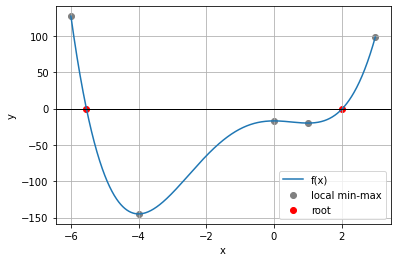

In [11]:
x = np.arange(-6, 3, 0.01)
y = f(x)


ex = find_extrema(x, y)  # аргументи екстремумів
exy = [f(i) for i in ex] # значення в екстремумах

x0 = bisection_roots(ex)
y0 = [0 for i in range(len(x0))]

print(bisection_roots(ex))
print(newton_roots(ex))
plotting(x, y, ex, exy, x0, y0)